In [41]:
import sys
sys.path.append('PyGazeAnalyser-master\\pygazeanalyser')

#pygaze imports
from pygaze import *
from edfreader import *
from gazeplotter import *

#other python libs import
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

#csv import 
import csv
import cv2

### CSV File

In [15]:
fname = 'dataset_0423.csv'

data_set = []
with open(fname, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in csvreader:
        row = row[0].split(',') #split by comma separated 
        data_set.append(row)



'1'

In [17]:
partic_id = 'G036'
game_nr  = 1
trial_nr = 1

print(partic_id[-2:])

36


### Particpant ID: G036

#### Using Gazeplotter

[]

In [47]:
#participant details
partic_id = 'G036'
game_nr  = 4

#read data using read_edf function
fname = 'Participant Data/'+str(partic_id)+ '/' + str(partic_id) + \
         str('_') + str(game_nr) + str('.asc') #path of the ASC file

# Stimulus phase
start_message = 'SYNCTIME'
stop_message = 'CC'
data = read_edf(fname,start='SYNCTIME',stop='CC') #start and stop indicators can be found in the ASC file

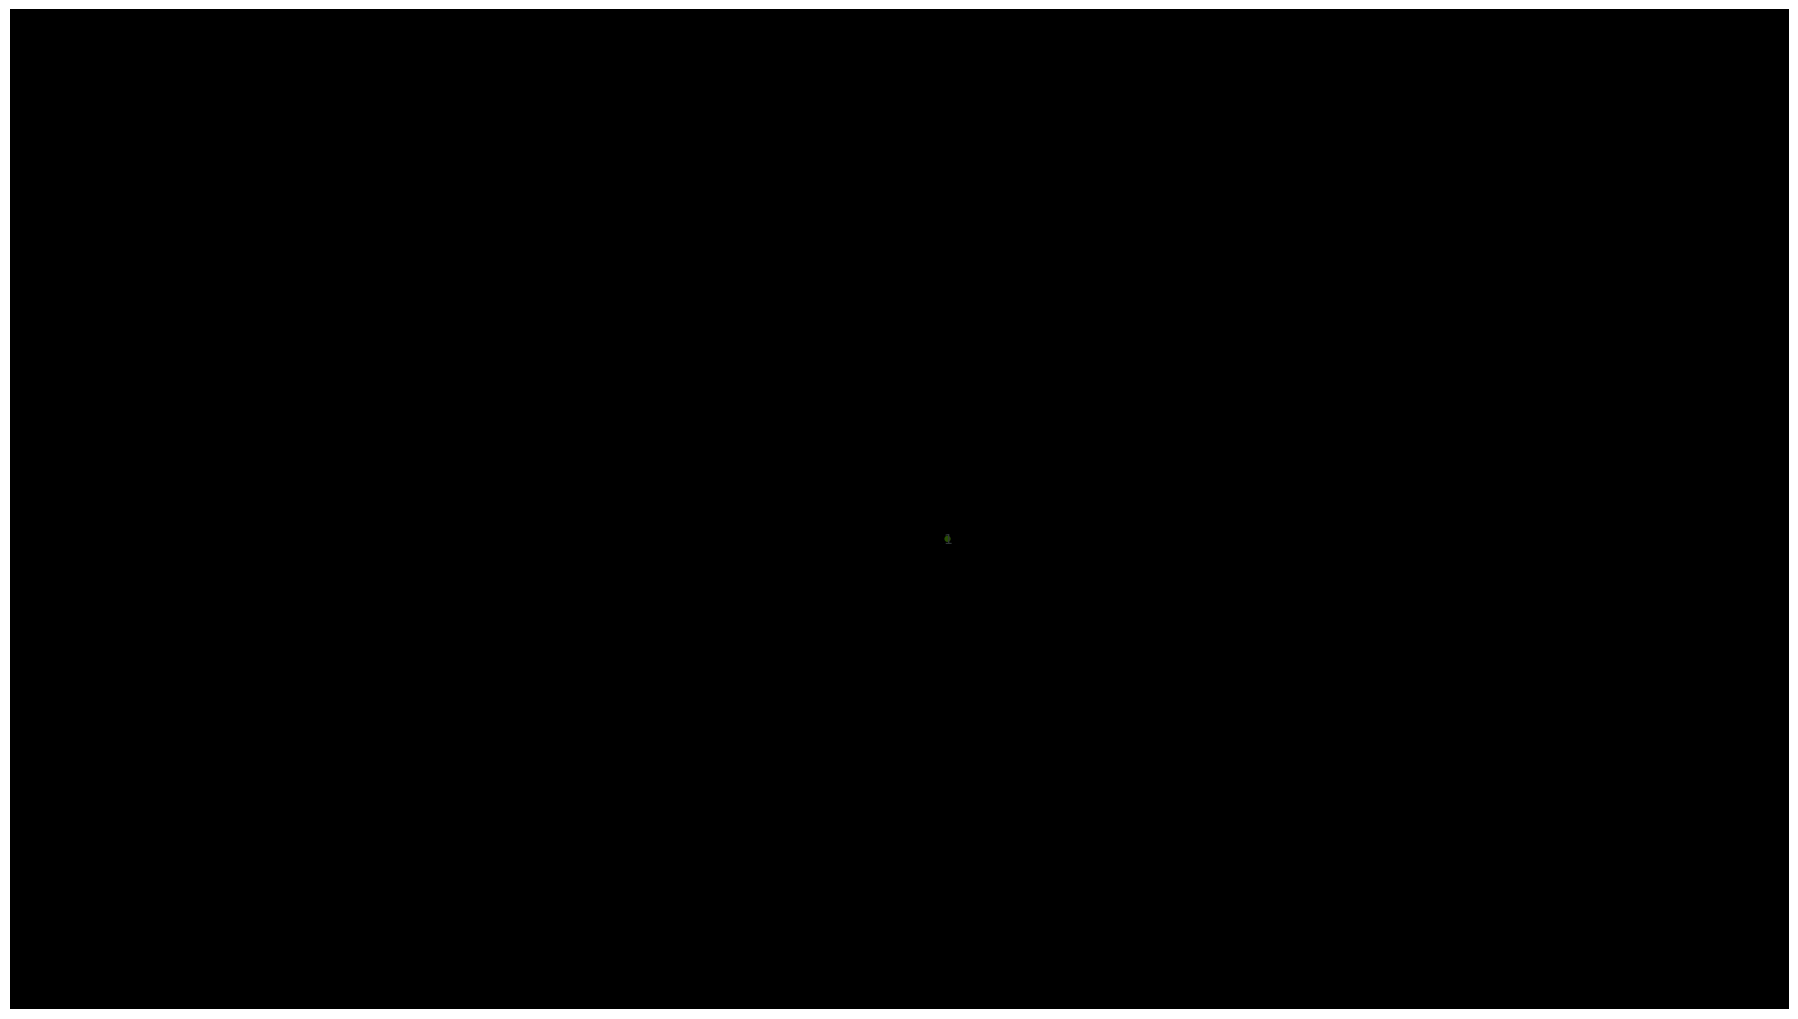

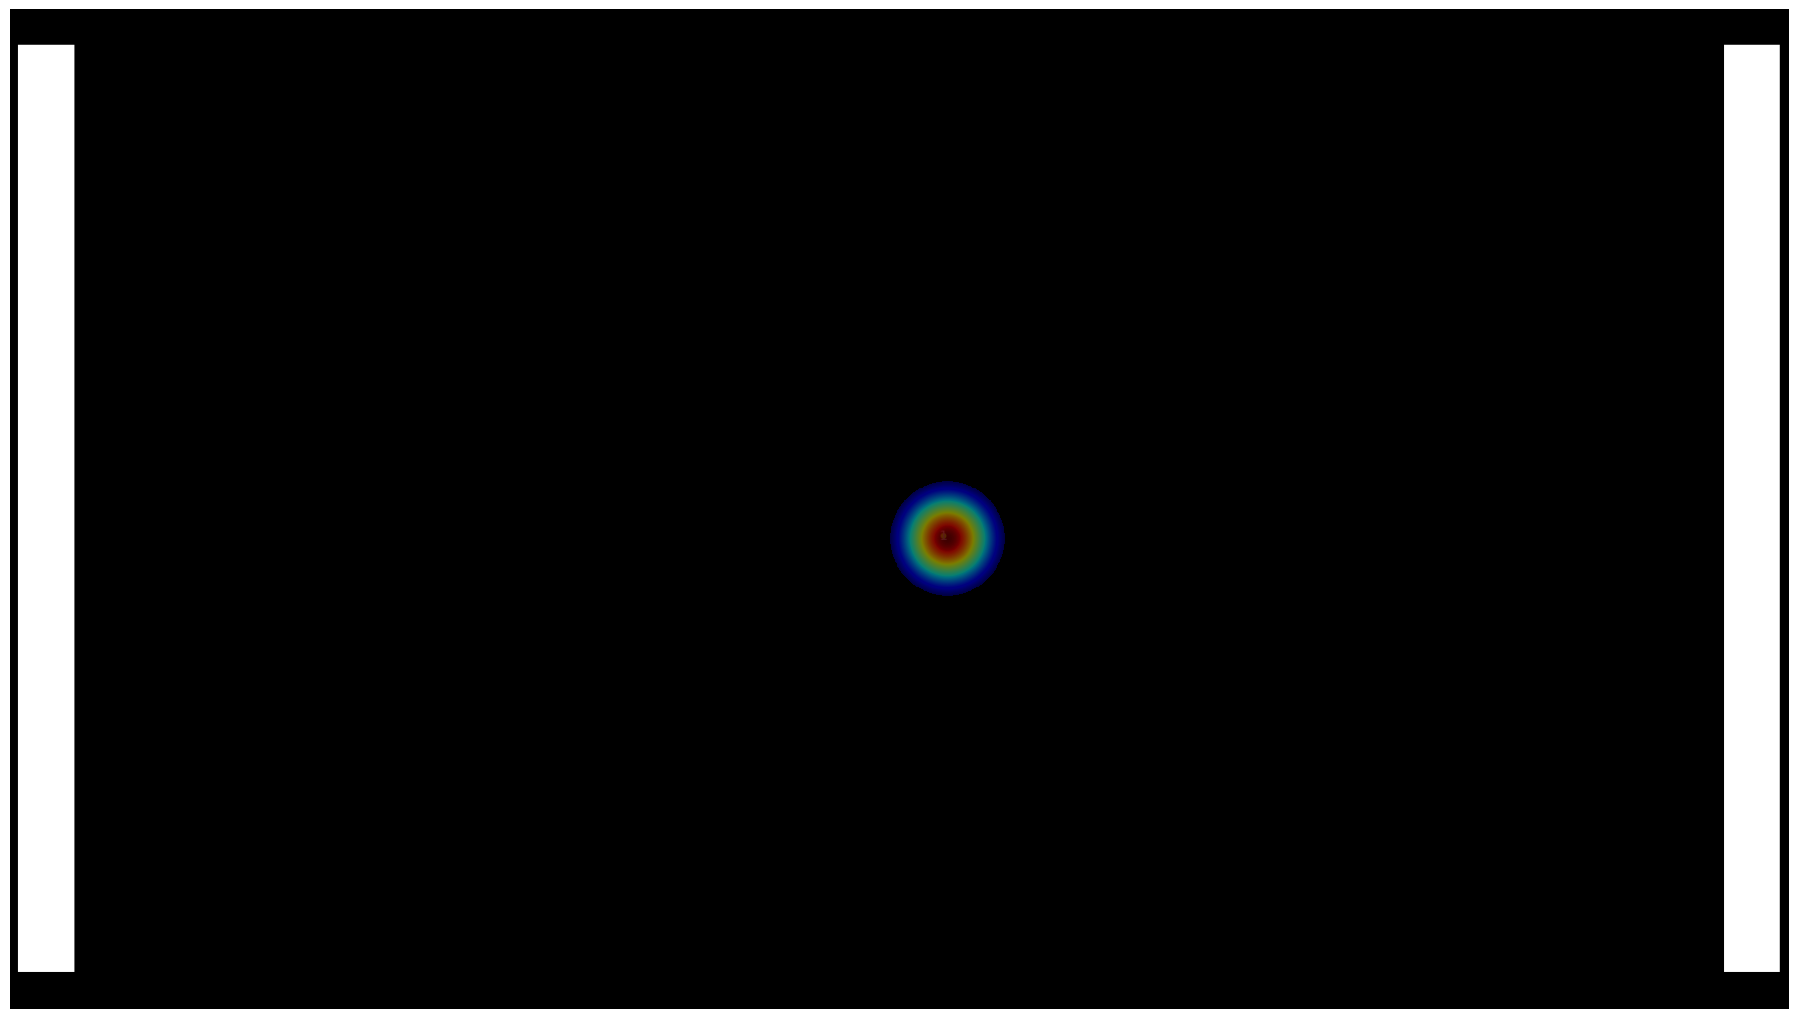

In [48]:
trial_nr = 12
#saccades and fixations
saccades = np.array(data[trial_nr]['events']['Esac'])
fixations = np.array(data[trial_nr]['events']['Efix'])
dispsize= (1919,1079) # (px,px) size of screen 

# draw saccadic scanpath and save fig

#saves as id+game_nr+trial_nr+current date time
savefilename = 'output_images/' + str(partic_id) + '_game_'+str(game_nr)+'_' \
               + str(trial_nr) + '_'+ time.strftime("%Y%m%d-%H%M%S")
fig = draw_scanpath(fixations, saccades, dispsize, imagefile=None, alpha=0.5, savefilename=savefilename)

#draw heatmap on top of it
img_file = savefilename + '.png'
fig_heatmap = draw_heatmap(fixations, dispsize, imagefile=img_file)
img_heatmap_file = savefilename + '_heatmap'
fig_heatmap.savefig(img_heatmap_file)


### Estimating Crosshair Position from Fixation Time

In [59]:
def return_cross_pos(game_nr,trial_nr):
    """
    Returns the averaged cross_hair position as calculated from the
    fixation time
    
    
    @Input:
    data : data during fixation time
    
    """
    
    fname = 'Participant Data/'+str(partic_id)+ '/' + str(partic_id) + \
         str('_') + str(game_nr) + str('.asc') #path of the ASC file
    data = read_edf(fname,start='TRIALID',stop='SYNCTIME') #fixation time
    x = np.array(data[trial_nr]['x'])
    y = np.array(data[trial_nr]['y'])
    x_mean,y_mean = np.mean(x), np.mean(y)
    return x_mean, y_mean

In [60]:
return_cross_pos(4,12)

(0.0, 0.0)

### OpenCV Manipulations 


h


5

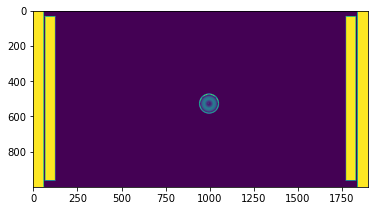

In [49]:
image_load = cv2.imread(img_heatmap_file+'.png',0)


## find number of blobs 

#threshold
_,thresh_image = cv2.threshold(image_load,10,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)cv2.threshold(img_gray, thresh, 150, 255, THRESH_BINARY);
contours, hierarchy = cv2.findContours(thresh_image,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


cutoff_cnts = [] #relevant contours 
for cnt in contours:
    #check for circle enclosing contour
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(np.ceil((radius)))
   
    if radius <100:
        #draw circular contours
        cv2.circle(image_load,center,radius,(255,255,0),2)
        print('h')
    cv2.drawContours(image_load,cnt,contourIdx=-1, color=(255, 255, 0), thickness=2,\
                     lineType=cv2.LINE_AA)   
        
plt.imshow(image_load)
len(contours)

### Different Trial Numbers 

### Sija's Code

In [20]:
# analysis script for eye tracking project
#
# version 4 (Apr 2021)
#
# looks all the data from Start to End

__author__ = "Sijamini Baskaralingam"

# native
import os

# custom
from edfreader import read_edf
from gazeplotter import draw_fixations, draw_heatmap, draw_scanpath, draw_raw

# external
import numpy


# # # # #
# CONSTANTS

# PARTICIPANTS
PP = str(input("participant ID?: "))
PPS = [PP+"_1", PP+"_2", PP+"_3", PP+"_4", PP+"_5", PP+"_6", PP+"_7", PP+"_8", PP+"_9", PP+"_10", PP+"_11", PP+"_12", PP+"_13", PP+"_14", PP+"_15", PP+"_16"]
print(PPS)

# DIRECTORIES
# paths
__file__ = 'C:\\Users\\adith\\OneDrive\\Documents\\Courses\\ETH\\Neural Systems\\Course Project\\pygazeanalyser\\data'
DIR = os.path.dirname(__file__)
IMGDIR = os.path.join(DIR, 'imgs')
DATADIR = os.path.join(DIR, 'data')
PLOTDIR = os.path.join(DIR, 'plots')
OUTPUTFILENAME = os.path.join(DIR, "output.txt")
# check if the image directory exists
if not os.path.isdir(IMGDIR):
	raise Exception("ERROR: no image directory found; path '%s' does not exist!" % IMGDIR)
# check if the data directory exists
if not os.path.isdir(DATADIR):
	raise Exception("ERROR: no data directory found; path '%s' does not exist!" % DATADIR)
# check if output directorie exist; if not, create it
if not os.path.isdir(PLOTDIR):
	os.mkdir(PLOTDIR)

# DATA FILES
SEP = '\t' # value separator
EDFSTART = "START" # EDF file trial start message
EDFSTOP = "END" # EDF file trial end message
TRIALORDER = [EDFSTART, 'image online','image offline', EDFSTOP]
INVALCODE = 0.0 # value coding invalid data

# EXPERIMENT SPECS
DISPSIZE = (1919,1079) # (px,px)
SCREENSIZE = (53.3,29.9) # (cm,cm)
SCREENDIST = 27 # cm
PXPERCM = numpy.mean([DISPSIZE[0]/SCREENSIZE[0],DISPSIZE[1]/SCREENSIZE[1]]) # px/cm


# # # # #
# READ FILES

# loop through all participants
for ppname in PPS:
	
	print("starting data analysis for participant '%s'" % (ppname))

	# BEHAVIOUR
	#print("loading behavioural data")
	
	# path
	#fp = os.path.join(DATADIR, '%s.txt' % ppname)
	
	# open the file
	#fl = open(fp, 'r')
	
	# read the file content
	#data = fl.readlines()
	
	# close the file
	#fl.close()
	
	# separate header from rest of file
	#header = data.pop(0)
	#header = header.replace('\n','').replace('\r','').replace('"','').split(SEP)
	
	# process file contents
	#for i in range(len(data)):
	#	data[i] = data[i].replace('\n','').replace('\r','').replace('"','').split(SEP)
	
	# GAZE DATA
	print("loading gaze data")
	
	# path
	fp = os.path.join(DATADIR, '%s.asc' % ppname)
	
	# check if the path exist
	if not os.path.isfile(fp):
		# if not, check if the EDF exists
		edfp = os.path.join(DATADIR, '%s.edf' % ppname)
		if os.path.isfile(edfp):
			# if it does, convert if usinf edf2asc.exe
			os.system("edf2asc %s" % edfp)
			# load ASCII
			fp = os.path.join(DATADIR, '%s.asc' % ppname)
		# if it does not exist, raise an exception
		else:
			raise Exception("No eye data file (neither ASC, nor EDF) file found for participant '%s' (tried paths:\nASC: %s\nEDF: %s" % (ppname, fp, edfp))
	
	# read the file
	#edfdata[trialnr]['time'] = list of timestamps in trialnr
	#edfdata[trialnr]['size'] = list of pupil size samples in trialnr
	edfdata = read_edf(fp, EDFSTART, stop=EDFSTOP, missing=INVALCODE, debug=False)
	
	# NEW OUTPUT DIRECTORIES
	# create a new output directory for the current participant
	pplotdir = os.path.join(PLOTDIR, ppname)
	# check if the directory already exists
	if not os.path.isdir(pplotdir):
		# create it if it doesn't yet exist
		os.mkdir(pplotdir)


	# # # # #
	# PLOTS
	
	print("plotting gaze data")

        # load image name, saccades, and fixations
	#imgname = data[trialnr][header.index("image")]
	imgname=None
	saccades=[]
	fixations=[]

	# loop through trials
	for trialnr in range(0,16):
		saccades_temp = edfdata[trialnr]['events']['Esac'] # [starttime, endtime, duration, startx, starty, endx, endy]
		fixations_temp = edfdata[trialnr]['events']['Efix'] # [starttime, endtime, duration, endx, endy]
		saccades = saccades + saccades_temp
		fixations = fixations + fixations_temp
		print("Saccades: ", saccades)
		print("Fixation: ", fixations)
		
	# paths
	#imagefile = os.path.join(IMGDIR,imgname)
	imagefile = None
	#rawplotfile = os.path.join(pplotdir, "raw_data_%s_%d" % (ppname,trialnr))
	#scatterfile = os.path.join(pplotdir, "fixations_%s_%d" % (ppname,trialnr))
	#scanpathfile =  os.path.join(pplotdir, "scanpath_%s_%d" % (ppname,trialnr))
	heatmapfile = os.path.join(pplotdir, "heatmap_%s_%d" % (ppname,trialnr))
	
	# raw data points
	#draw_raw(edfdata[trialnr]['x'], edfdata[trialnr]['y'], DISPSIZE, imagefile=imagefile, savefilename=rawplotfile)

	# fixations
	#draw_fixations(fixations, DISPSIZE, imagefile=imagefile, durationsize=True, durationcolour=False, alpha=0.5, savefilename=scatterfile)
	
	# scanpath
	#draw_scanpath(fixations, saccades, DISPSIZE, imagefile=imagefile, alpha=0.5, savefilename=scanpathfile)

	# heatmap		
	draw_heatmap(fixations, DISPSIZE, imagefile=imagefile, durationweight=True, alpha=0.5, savefilename=heatmapfile)


KeyboardInterrupt: Interrupted by user